<div style='background-image: url("../share/images/header.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Inverse Problems</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Introduction to Full Wavefield Inversion - 1D example </div>
        </div>
    </div>
</div>

Seismo-Live: http://seismo-live.org

##### Authors:
* Peter Mora [mail](wolop2008@gmail.com)

---

The examples in the [Introduction to inversion](fwi_introInversion.ipynb) notebook has demonstrated that the conjugate gradient method has good convergence properties, and does not require the Hessian matrix which cannot be calculated for most real large scale geophysical inverse problems. In this notebook, we provide an example of full wavefeld inversion in which an observed wavefield at receivers is inverted for the subsurface properties of rocks (only the density for simplicity). This will illustrate how to solve an inverse problem in geophysics even when the linearized forward problem cannot be
expressed as a matrix equation.


The theory of elastic wavefield inversion was first developed in the acoustic approximation in the mid 1980's (Tarantola, 1984) and in for the full elastic case, it was developed and demonstrated in the late 1980's (Mora, 1987,1988,1989; Tarantola, 1988).
However, due to the high computational cost, it only became widely researched since the turn of the century, and is now available commercially by seismic data processing companies.

Since the mid 2000's, large scale data sets have been inverted successfully both for real data and a general purpose synthetic data set named the Marmousi Model, that was created by the Institut Francais du Petrole (IFP). This has lead to a burst of research activity on Full Wavefield Inversion and a number of patents on this topic, with the current major focus being on improvement of the convergence properties such as the study of preconditioners (eg. Choi, 2008), and the resolution of the different properties including anisotropy (eg. Warner et al., 2013).

## Formulation of the inverse problem for Full Wavefield Inversion (FWI)

In order to solve an inverse problem using the theory presented in the previous section, one requires the ability
to solve the forward problem to generate synthetic data ${\bf d} ( {\bf m} )$ and the data residuals $\Delta {\bf d}$, and to calculate the adjoint operation on the data residuals that is equivalent to the matrix equation ${\bf D}^T \Delta {\bf d}$.
To achieve this goal, one needs to express the linearized forward problem as an integral equation equivalent
to ${\bf D} \Delta {\bf m}$. Once this has been done, the kernel of the Fr\'echet matrix ${\bf D}$ can be identified, and one can integrate this kernel over the data space to perform the equivalent operation as the adjoint operation ${\bf D}^T \Delta {\bf d}$.
This is done in detail in Tarantola, 1988 and Mora, 1987. In the following, the derivation for a 1D Full Waveform Inversion problem is presented to illustrate how the adjoint operator can be derived and calculated.
Subsequently, results of a 1D Full Waveform Inversion solving for density $\rho (x)$, and a 2D FWI solving for density and the Lam\'e moduli $\lambda({\bf x)}$ and $\mu({\bf x)}$ are presented to illustrate this method.

### The forward problem and its linearization

Consider the 1D wave equation for a medium with variable density and a constant elastic modulus $\lambda$ given by
\begin{equation}
\rho {{\partial^2 u } \over {\partial t^2}} \ - \ \lambda {{\partial^2 u} \over {\partial x^2}} \ = \ f \ \ \ ,
\ \ \ \tag{1}
\end{equation}

where $u$ is the displacement, $f$ is a source term, and $\rho = \rho ( x )$ is the space variable density. In this section, we will solve the wave equation by a direct method, finite-differences. However, in the derivation of the adjoint operation, we require an integral solution to the wave equation, which can be expressed mathematically in terms of Green's functions (impulse response). The solution of the elastic wave equation in terms of the Green's functions is (see Aki & Richards, 1980)

\begin{equation}
u ( x_R ,t ) \ = \ \int_V dV \ G ( x_R, t; x_S ,0) * f (x_S ,t) \ \ \ ,
\ \ \ \tag{2}
\end{equation}

where $G ( x_R , t ; x_S , 0)$ is the Green's function (impulse response) defining the output at receiver location $x_R$ and time $t$ due to an impulse (Dirac delta) source function at position $x_S$ and time $t=0$, $f (x_S ,t)$ is the forcing function at source location $x_S$, and $\int dV = \int dx_S$ defines the integral over the source volume which in this case is over the source location axis, $x_S$.

In order to derive the equation for the adjoint operation, we must first derive the linearized forward problem.
This can be achieved by making the following substitutions

\begin{equation}
\begin{aligned}
\rho \  & \rightarrow \rho \ + \ \delta \rho \\
u   \   & \rightarrow u  \ + \ \delta u \ \ \ ,
\end{aligned}
\end{equation}

which leads to the new equation

\begin{equation}
\rho \partial_{tt} \delta u \ - \ \lambda \partial_{xx} \delta u  \ + \ O (\delta u, \delta \rho)^2\ = \ \delta f \ \ \ , \ \ \ \tag{3}
\end{equation}

where $\partial_{tt} = \partial^2 / \partial t^2$ and $\partial_{xx} = \partial^2 / \partial x^2$. Equation (3)
 has the same form as the wave equation (1) plus second order terms, $O^2$, and with a new source term $\delta f$ given by
 
\begin{equation}
\delta f \ = \ - \delta \rho \partial_{tt} u \ \ \ ,
\end{equation}

By dropping the higher order terms (ie. first order Born approximation) from Equation (3), we have a new
wave equation that must be solved which correspons to the linearized forward problem. The solution can be now be expressed as an integral equation via the Green function solution given by Equation (2) with a new source term $\delta f$ relating to the displacement perturbations $\delta u$

\begin{equation}
\begin{aligned}
\delta u ( x_R ,t ) \ & = \ \ \ \ \int_V dV \ G ( x_R, t; x_S ,0) * \delta f (x_S ,t) \\
                      & = \ - \int dx \ \  G ( x_R, t; x ,0) * \delta \rho (x) \partial_{tt} u (x,t) \ \ \ .
\end{aligned}
\end{equation}

Hence, the linearized forward problem can be written as an integral equation

\begin{equation}
\delta d ( t ) \ = \ \delta u ( x_R , t)  \ = \ - \int dx \ \  G ( x_R, t; x ,0) * \partial_{tt} u (x,t) \delta \rho (x) \ \ \ .\ \ \ \tag{4}
\end{equation}

Comparing Equation (4) with the matrix equation for the linearized forward problem given by

\begin{equation}
\Delta {\bf d} \ = \ {\bf D}  \Delta {\bf m} \ = \ {\partial {\bf d} \over \partial {\bf m}} \Delta {\bf m} \ \ \ ,
\end{equation}

which expressed as an integral is

\begin{equation}
\delta d \ = \ \int_M \ \ dM \ {{\partial d} \over {\partial m}} \delta m
\ = \ \int \ \ dx \ {{\partial d} \over {\partial m}} \delta m \ \ \ ,\ \ \ \tag{5}
\end{equation}

where $M$ is used to denote the model space which is the volume in the earth $V$ spanning
the model parameters $m$. In this 1D example where we seek to solve for $\rho (x)$, the volume $V$ specifying the model space is just $x$, position along the 1D axis.
Comparing Equation (5) with Equation (4) allows the Frechet derivative kernel $\partial d / \partial m$ to be identified as
\begin{equation}
{{\partial d} \over {\partial m}} \ = \ - G ( x_R, t; x ,0) * \partial_{tt} u (x,t) \ \ \ .\ \ \ \tag{6}
\end{equation}
and hence, the adjoint operation can be expressed by integrating the product of this kernel with the data
perturbations $\delta d$ over the data space $D$, where $D$ in this example spans the receiver location(s) $x_R$ and time $t$. Namely, the adjoint operation applied to the data residuals is given by

\begin{equation}
\delta \hat m \ = \ \int_D \ \ dD \ {{\partial d} \over {\partial m}} \delta d
\ = \ \int dx_R \int dt {{\partial d} \over {\partial m}} \delta d \ \ \ .\ \ \ \tag{7}
\end{equation}

### The adjoint operator

The gradient vector is calculated as the adjoint operator applied to the data residuals which, when expressed as a matrix operation, is given by the transpose of the Fr\'echet matrix times the data residual vector, namely
\begin{equation}
\hat {\bf g} \ = \ \Delta {\bf \hat m} \ = \  {\bf D}^T \Delta {\bf d} \ \ \ , 
\end{equation}
where the hat over the gradient vector $\bf g$ is used to denote that this gradient vector is not
complete as it is neglects the data and model covariances (ie.
it is equal to the gradient vector with ${\bf C}_{\bf d} = {\bf I}$ and ${\bf C}_{\bf m}^{-1} = 0 \Rightarrow $ no model constraints).
The $\Delta {\bf \hat m}$ is defined by the above equation, and is the raw gradient direction in the model space
where raw means without the modifying effect of data and model covariances.

Hence, the adjoint operator is equal to an integral of the Fr\'echet kernel $\partial d / \partial m$ times the data residuals $\delta d$
over the data domain. Namely, the adjoint operator expressed as an integral equation is given by
Equation (7), namely,

\begin{equation}
\begin{aligned}
\delta \hat \rho (x) \ & = \ - \int dx_R \int dt \ \ {{\partial d} \over {\partial m}} \delta u (x_R , t)  \\
                       & = \ - \int dx_R \int dt \ \ G (x_R, t; x,0) * \partial_{tt} u ( x,t) \delta u (x_R , t)  \\
                       & = \ - \int dx_R \int dt \ \ \partial_{tt} u(x, t) *  G(x_R ,t;x,0)   \delta u (x_R , t) \\
                       & = \ - \int dx_R \int dt \ \ \partial_{tt} u(x,-t) G(x_R , t;x  ,0) * \delta u (x_R ,-t) \\
                       & = \ - \int dx_R \int dt \ \ \partial_{tt} u(x,t)  G(x_R ,-t;x  ,0) * \delta u (x_R , t) \\
                       & = \ - \int dx_R \int dt \ \ \partial_{tt} u(x,t)  G(x   ,-t;x_R,0) * \delta u (x_R , t) \ \ \ ,
\end{aligned}
\end{equation}
and hence, the adjoint operator applied to the data residuals $\delta u ( x_R,t)$ is given by
\begin{equation}
\begin{aligned}
\delta \hat \rho (x) \ & = \ - \int dx_R \int dt \ \ \ {{\partial^2 u } \over {\partial t^2}} (x,t) \psi_R (x,t) \\
                       & = \ \ \ \ \int dx_R \int dt \ \ \ {{\partial u } \over {\partial t}} (x,t) {{\partial  \psi}_R \over {\partial t}}  (x,t) \ \ \ ,\ \ \ (8)
\end{aligned}
\end{equation}
where the wavefield $\psi_R (x,t)$ is given by
\begin{equation}
\psi_R ( x,t) \ = \ G(x ,-t;x_R,0) * \delta u (x_R ,t) \ \ \ .\ \ \ (9)
\end{equation}

The Green's function in Equation (9) is the impulse response backwards in time of the
forcing function $\delta u$. This forcing function is the residuals $\delta u ( x_R , t)$ which is the
difference between the observed and calculated wavefields at receiver locations $x_R$.
Therefore, the wavefield $\psi$ in Equation (9) can be interpreted as the
backwards propagated residuals. That is, the difference between the calculated data and the observed data,
$\delta u(x_R ,t) = u(x_R ,t) - u_0 (x_R ,t)$, is applied as the forcing function $f(t)$
in the wave-equation given by Equation (1), which is then solved in
reverse time.

The steps in the derivation above given by Equation (8), leading to the equation for the adjoint operator given
by Equations (8) and (9), make use of the commutativity of convolution as
well as the properties of convolution and integrals as follows
\begin{equation}
\int dt \ \ f(t) * g(t) \ = \ \int dt \ \ g(t) * f(t) \ \ \ ,
\end{equation}
\begin{equation}
\int dt \ \ f(t) * g(t) h(t) \ = \ \int dt \ \ f(-t) g(t) * h(-t) \ \ \ ,
\end{equation}
\begin{equation}
\int dt \ \ f(-t) g(-t) \ = \ \int dt \ \ f(t) g(t) \ \ \ ,
\end{equation}
and final step makes use of the reciprocity of Green's functions\cite{Aki-Richards} (ie. interchangeability of
$x_S$ and $x_R$), ie.
and
\begin{equation}
G(x,t ; x_S ,0) \ = \ G(x_S ,t;x,0) \ \ \ .
\end{equation}
Equation (8) makes use of integration by parts. Namely,
\begin{equation}
\int_0^T dt \ \ \ddot f \ g  \ = \ [ \dot f \ g ]_0^T \ - \ \int_0^T dt \ \ \dot f \ \dot g  \ = \ - \ \int_0^T dt \ \ \dot f \ \dot g  \ \ \ ,
\end{equation}
where $f(t) = u(t)$ and $g(t) = \psi (t)$, where $t=0$ is the time the source starts. The term $[\dot f \ g]_0^T$ is null due
to the initial conditions, $\dot u (t \le 0) = 0$ and $u(t \le 0) = 0$, and given that the back propagated wavefield
is null after the final time $t = T$, ie. $\psi ( t \ge T ) = 0$.

The development shown in Equation (8) demonstrates that the adjoint operation to compute the
gradient vector for $\rho$ can be achieved by integration of the time derivatives of two wavefields denoted $u(x,t)$ and $\psi (x,t)$.
The wavefield $u(x,t)$ is the wavefield obtained by simulating waves in the current model for density $\rho (x)$, and
Equation (9) demonstrates that the wavefield $\psi (x,t)$ can also be obtained by simulating
waves in reverse time due to a source term equal to the data residuals $\delta u ( x_R ,t)$, which is the difference between
the simulated wavefield $u$ and the observed wavefield $u_0$ at the receiver locations $x_R$.


### Finite-difference solution to the wave-equation

The partial derivatives in Equation (1) can be expressed as finite-difference approximations. To second order, the wave equation becomes

\begin{equation}
\rho(x) {{u(x,t+ \Delta t ) - 2 u(x,t) + u(x,t- \Delta t ) } \over {\Delta t^2 }} \ - \ \lambda(x) 
{{u(x + \Delta x,t) - 2 u(x,t) + u(x- \Delta x,t) } \over {\Delta x^2}} \ = \ 0 \ \ \ ,
\end{equation}
which can be rearranged as an explicit finite-difference scheme

\begin{equation}
u(x,t+ \Delta t ) \ = \ 2 u(x,t) - u(x,t- \Delta t ) \ + \ s^2 \left[ u(x + \Delta x,t) - 2 u(x,t) + u(x- \Delta x,t) \right] \ \ \ ,\ \ \ \tag{10}
\end{equation}

where $s = c (\Delta t / \Delta x)$ where $c = \sqrt{ \lambda / \rho}$ is the wave velocity in the model, and with the model spanning $x \in [ 0,X ]$.
For simplicity, the boundary conditions are Dirichlet for the boundary condition at $x = 0$, so $u (x=0,t) = 0$ and an open boundary is used for the boundary at $x= X$. Namely, the one wave equation for waves travelling to the right is used for the boundary at $x=X$ given by

\begin{equation}
{{\partial u } \over {\partial t}} (x,t) \ + \ c(x) {{\partial u } \over {\partial x}} (x,t) \ = \ 0 \ \ \ ,
\end{equation}

which when written as a finite-difference equation to solve for the value of $u( X,t)$ becomes

\begin{equation}
u(X,t ) \ = \ u(X,t- \Delta t ) \ - \ s \left[ u(X,t) - u(X - \Delta x,t ) \right] \ \ \ .\ \ \ \tag{11}
\end{equation}




### Full Wavefield Inversion: a 1D example

The explicit finite-difference scheme give by Equations (10)
and (11) were used to compute synthetic data,
a seismogram located at $x = \Delta x$ in the 1D model. The
density model used to calculate the synthetic observed data was set to unity plus Gaussian distributed perturbations (green line of the first plot), and the solution after 20 iterations is shown in the blue line.
The synthetic data is shown in the green line of the second plot and the residuals after 20 iterations is shown in the blue line. The foward propagated wavefield $u(x,t)$
in this model is shown in the second to last plot. In this model, one often sees considerable multiple refelction energy after the last primary reflection.

A Full Wavefield Inversion was carried out by applying the conjugate gradient method.
The Polak-Ribiere method was used to calculate
the value of $\beta = \beta^{PR}$ and a line search was used
to calculate the optimal steplength $\alpha$. The starting density model was initialized to be homogeneous, with
$\rho_1 = 1$, and 20 conjugate gradient iterations specified in the python code.

The back propagated residual wavefield $\psi ( x,t)$ is calculated using the same explicit
finite-difference scheme applied in reverse time with the data
residuals, $\delta d ( t ) = \delta u ( x_R ,t) = u(x_R ,t)  - u_0 (x_R ,t)$, applied as the forcing function at
the receiver location $x_R = \Delta x$, and (2)
the calculation of the gradient using Equation (8).
The last plot shows the back proagated residual wavefield at the first iteration, which is equal to the
wavefield generated by using the observed seismogram as a forcing function in reverse time.
The gradient calculation at iteration 1 is the integral over time of the product of the time derivative of the back propagated residual wavefield and the forward propagated wavefield at iteration 1, which is just the rightward
propagating direct wave shown in the second to last plot.

One can see from this example that these two wavefields will intersect and contribute to the gradient calculation at
the reflector locations. Hence, at the first iteration, the gradient will consist of density perturbations induced by any wiggle on
the observed seismogram. In effect, all wiggles of the seismogram are viewed as primary reflections in the first iteration, even if they may
be induced by multiple reflections. However, Full Wavefield Inversion will iterate and eventually model
multiple reflections correctly and thus remove any ghost signals in the density model caused by multiple
reflections. In contrast, linearized inversion is unable to correctly account for multiple reflections and
any other nonlinearity.

The sum of square error as a function of iterations is shown in the third plot.
The true density model used to generate the data is shown together with the density solution after 20 iterations
is shown in the first plot. This plot shows that the resolved density model
after 20 iterations is close to the true density model, with only minor differences in some places,
mainly small high frequency differences, or not quite getting the low wavenumbers (the blocky nature of the model). The blue line of the second plot is the final
residual error between the seismograms computed with the density model solution and the true model. As the residual error
is very close to zero, this plot shows that the inversion has obtained a model that generates data that is almost
identical to the observed data = data calculated with the true density model.

The minor differences between the resolved density model and the true density model
are in part the result of errors in the finite-difference scheme used to calculate
the wavefields $u(x,t)$ and $\psi(x,t)$. One can see significant high frequency oscillations
trailing the main wavefronts in the last two images.
These high frequency errors are due to numerical dispersion in the second order
finite-difference scheme.

In [1]:
# Import libraries (PLEASE RUN THIS CODE FIRST)

#-------------------------------------------------------------------------------
# Full wavefield inversion in 1D for density
#
# Author: Peter Mora
# Date:   1/1/2017
#
#-------------------------------------------------------------------------------

import matplotlib
import time
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import random
from numpy.random import randn
import math
from mpl_toolkits.mplot3d import axes3d, Axes3D 
from pylab import *

In [2]:
# Definintion of functions
#------------------------------------------------------------------------------------------
# Find the steplength alpha by fitting a least-squares parabola and solving for the minimum
#------------------------------------------------------------------------------------------

def ls_alpha(a,e,i0,n):

    l      = n-i0
    A      = np.zeros((l,l))
    Ai     = np.zeros((l,l))
    b      = np.zeros(l)
    x      = np.zeros(l)

    a_max  = a[n-1] - a[i0]
    for i in range(i0,n):
        xx       = (a[i]-a[i0])/a_max
        yy       = e[i]
        for j in range (l):
            b[j] = b[j] + yy*xx**j
            for k in range (j,l):
                A[j][k] = A[j][k] + xx**(j+k)
                A[k][j] = A[j][k]
        for j in range (l):
            A[j][j] = A[j][j] + 1e-9
    Ai        = inv(A)
    x         = np.dot(Ai,b)
    alpha     = a[i0] - a_max * x[1]/(2*x[2])
    return alpha

#------------------------------------------------------------------------------------------
# Find the error for a given steplength alpha
#------------------------------------------------------------------------------------------

def error(m,alpha,c):
    mm = m - alpha * c
    u = u_(mm)
    for it in range(t0,nt):
        d[it] = u[it][1]
    Delta_d = d - d_0
    e = np.dot(Delta_d.transpose(),Delta_d)
    return e

#------------------------------------------------------------------------------------------
# Do a line search to find the steplength alpha
#------------------------------------------------------------------------------------------

def line_search(m,c,alpha_last,error_last):

#   Initialize alpha values in the range 0 - alpha_max

    DD = 1
    alpha_max = 0.95*(np.min(m) * dx**2 - np.max(lam) * DD * dt**2)/(np.max(c) * dx**2)
    alphas = np.zeros(4)
    errors = np.zeros(4)
    alphas[0] = 0
    errors[0] = error_last
    alphas[3] = alpha_max

    if alpha_last>0:
        alphas[1] = min(alpha_last,alpha_max/3)
        alphas[2] = min(2*alpha_last,2*alpha_max/3)
    else:
        alphas[1] = (2*alphas[0]+alphas[3])/3
        alphas[2] = (alphas[0]+2*alphas[3])/3

    errors[1] = error(m,alphas[1],c)
    errors[2] = error(m,alphas[2],c)
    errors[3] = error(m,alphas[3],c)

#   Iterate until the three alphas around the minimum are located

    iter = 0
    while (iter < 20 and not( errors[1] < errors[0] and errors[1] <= errors[2])) or errors[2] > 2*errors[0]:
        minimum = (errors[1] < errors[0] and errors[1] <= errors[2])
        good_range     = errors[2] < 2*errors[0]
        iter = iter+1
        if minimum and not good_range:
            alphas[2] = (alphas[1]+alphas[2])/2
            errors[2] = error(m,alphas[2],c)
        elif errors[2] < errors[1]:
            alphas[0] = alphas[1]
            errors[0] = errors[1]
            alphas[1] = alphas[2]
            errors[1] = errors[2]
            alphas[2] = (alphas[2]+alphas[3])/2
            errors[2] = error(m,alphas[2],c)
        elif (errors[1] > errors[0]):
            errors[3] = errors[2]
            alphas[3] = alphas[2]
            errors[2] = errors[1]
            alphas[2] = alphas[1]
            alphas[1] = (alphas[1]+alphas[0])/2
            errors[1] = error(m,alphas[1],c)

#   Find the optimal alpha by least squares fitting of a parabola

    alpha = ls_alpha(alphas,errors,0,3)

    return alpha

#------------------------------------------------------------------------------------------
# Forward modelling to calculate the wavefield u
#------------------------------------------------------------------------------------------

def u_(rho):
    uu   = np.zeros(X.shape)

#   Initialize a 1D displacement field at
#   time steps 0 and 1 as the source term

    for x in range(0,nx):
        uu[0][x] = np.exp(-((x-3.)/3.)**2)    # Initialize source term at time 0
        uu[1][x] = np.exp(-((x-3.)/3.)**2)    # Initialize source term at time 1

#   Loop over time and solve the wave-equation via a 1D explicit finite-difference scheme

    for t in range(2,nt-1):
        s = (dt/dx)*np.sqrt((lam[nx-1]/rho[nx-1]))
        uu[t][nx-1] = uu[t-1][nx-1] - s*(uu[t-1][nx-1]-uu[t-1][nx-2])
        for x in range(1,nx-1):
            s2 = (dt/dx)**2*(lam[x]/rho[x])
            uu[t][x] = 2*uu[t-1][x]-uu[t-2][x]+s2*(uu[t-1][x+1]-2*uu[t-1][x]+uu[t-1][x-1])

#   Return the wavefield

    return uu

#-------------------------------------------------------------------------------
# Solve for the adjoint: back propagation of the residuals through
# the model and correlation of the back propagated residual wave field
# with the forward propagated wavefield
#-------------------------------------------------------------------------------

def g_(Delta_u,rho):

    dR  = np.zeros(X.shape[1])

#   Loop over reverse time and solve the wave-equation via a 1D explicit
#   finite-difference scheme using the data residuals as a source-term

    for t in range(2,nt):
        tt = nt - t
        s = (dt/dx)*np.sqrt((lam[nx-1]/rho[nx-1]))
        w[tt][nx-1] = w[tt+1][nx-1] - s*(w[tt+1][nx-1]-w[tt+1][nx-2])
        for x in range(1,nx-1):
            s2 = (dt/dx)**2*(lam[x]/rho[x])
            w[tt][x] = 2*w[tt+1][x]-w[tt+2][x]+s2*( w[tt+1][x+1]-2*w[tt+1][x]+w[tt+1][x-1] )

#   Add the data residuals as a source-term

        if tt>nt/8: w[tt][1] = w[tt][1] + Delta_u[tt+1]

#   Correlate the time derivatives of the forward and back-propagated
#   wavefields to compute the density gradient field

    for t in range(1,nt-1):
        for x in range(0,nx):
            dR[x] = dR[x]+(w[t+1][x]-w[t][x])*(u[t+1][x]-u[t][x])/dt**2

#   Return the gradient field in density

    return dR

In [3]:
# Initializations
#===============================================================================
# Start of main program
#===============================================================================

# Initialize the time and spatial meshes

dt   = 0.5
dx   = 1
nt   = 251
t0   = int(nt/8)
nx   = 101
xmin = 0
xmax = (nx - 1) * dx
tmin = 0
tmax = (nt - 1) * dt
n_iter = 20

# Design variables at mesh points

ix = np.arange(0, nx, 1)
it = np.arange(0, nt, 0.5)
X, T = np.meshgrid(ix, it)

# Initialize the displacement fields

u    = np.zeros(X.shape)
u_0  = np.zeros(X.shape)
w    = np.zeros(X.shape)
w_0  = np.zeros(X.shape)

Delta_u   = np.zeros(nt)

# Initialize the model

rho_true = np.zeros(X.shape[1])
rho      = np.zeros(X.shape[1])
lam      = np.zeros(X.shape[1])
ss       = np.zeros(X.shape[1])

In [4]:
# Generate a random density model with a layer width of thick=5 gridpoints

sigma_rho = 0.2
for x in range(nx):
    rho_true[x] = 1.0
    lam[x]      = 1
    rho[x]      = rho_true[x]
thick = 4 ;
for il in range (4,12):
     x1 =  il   *thick
     x2 = (il+1)*thick
     delta_rho = sigma_rho * randn(1,1)
     for x in range(x1,x2):
         rho_true[x] = rho_true[x] + delta_rho

u_0 = u_(rho_true) # Calculate the forward propagated wavefield u through the true model

# Initialize the data and model spaces and various fields

nm = nx                      # Model dimensions
nd = nt                      # Data  dimensions
Delta_d = np.zeros(nd)       # Data residuals
dm = np.zeros((n_iter+1,nm)) # Data as a function of each iteration's model
E = np.zeros(n_iter)         # The sum of error versus iteration
E_last = np.zeros(n_iter)    # The sum of error versus iteration
d_0    = np.zeros(nd)        # The "observed" data
m_0    = np.zeros(nm)        # The model at iteration 0
d      = np.zeros(nd)        # The data at iteration n
g      = np.zeros(nm)        # The gradient direction
g_last = np.zeros(nm)        # The last gradient direction
c      = np.zeros(nm)        # The conjugate gradient direction
c_last = np.zeros(nm)        # The last conjugate gradient direction

for it in range(t0,nt):      # Set the "observed" data
    d_0[it] = u_0[it][1]     # = wavefield recorded at x = 1

# Initialize the model space and initial model

m       = np.zeros(nm)
m_0     = rho

#-------------------------------------------------------------------------
# Conjugate gradient FWI inversion algorithm
#-------------------------------------------------------------------------

# Loop over iterations

alpha_last = 0

for n in range(0,n_iter):
    print('Iteration = ',n+1)

#   Calculate the data, residual and error for the current model

    m = m_0 + dm[n][:]
    u = u_(m)
    for it in range(t0,nt): d[it] = u[it][1]
    Delta_d = d - d_0
    E[n] = np.dot(Delta_d.transpose(),Delta_d)

#   Calculate the gradient (steepest descent) direction

    g_last = g
    g = g_(Delta_d,m)
    if n == 0: w_0 = w

#   Compute the new conjugate direction

    if n == 0:
        g_last = g
        c_last = 0
    beta = np.dot(g.transpose(),(g-g_last))/np.dot(g_last.transpose(),g_last)
    if beta < 0: beta = 0
    c = g + beta * c_last
    c_last = c

#   Calculate the steplength alpha by a line search

    if n == 0: alpha = -1
    alpha = line_search(m,c,alpha_last,E[n])
    alpha_last = alpha

#   Update the model

    dm[n+1] = dm[n] - alpha * c

#   Set the plot to block and calculate model parameters and residuals at the solution

    if n == n_iter-1:
        m = m_0 + dm[n+1][:]
        u = u_(m)
        for it in range(t0,nt): Delta_d[it] = (u[it][1] - u_0[it][1])
        E[n] = np.dot(Delta_d.transpose(),Delta_d)

Iteration =  1
Iteration =  2
Iteration =  3
Iteration =  4
Iteration =  5
Iteration =  6
Iteration =  7
Iteration =  8
Iteration =  9
Iteration =  10
Iteration =  11
Iteration =  12
Iteration =  13
Iteration =  14
Iteration =  15
Iteration =  16
Iteration =  17
Iteration =  18
Iteration =  19
Iteration =  20


#### Generation of the plots

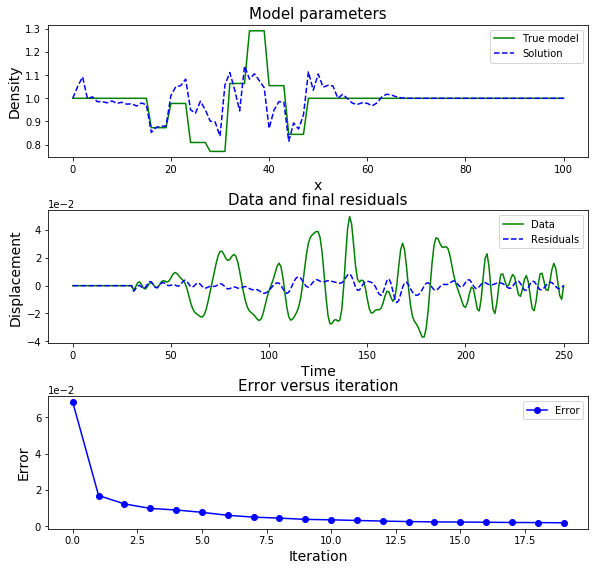

In [5]:
# Generation of the plots
#-------------------------------------------------------------------------
# Generate plots
#-------------------------------------------------------------------------

#   Plot the model parameters

plt.rcParams['figure.figsize'] = 10, 10
fig = plt.figure()
plt.gcf().subplots_adjust(left=0.18,right=0.9,top=0.85, bottom=0.2)
ax1 = fig.add_subplot(3,1,1)
ax1.ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
ax1.plot(rho_true,'g-')
ax1.plot(m,'b--')
ax1.legend(['True model','Solution'])
plt.title('Model parameters', fontsize=15)
plt.xlabel('x', fontsize=14)
plt.ylabel('Density', fontsize=14)
#plt.savefig('fwi_1D_model.png')

# Plot the data and residuals at the solution
plt.gcf().subplots_adjust(left=0.18,right=0.9,top=0.8, bottom=0.2)
ax2= fig.add_subplot(3,1,2)
ax2.ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
ax2.plot(d_0,'g-')
ax2.plot(-Delta_d,'b--')
ax2.legend(['Data','Residuals'])
plt.title('Data and final residuals', fontsize=15)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Displacement', fontsize=14)
#plt.savefig('fwi_1D_data.png')

# Plot the error versus iteration
plt.gcf().subplots_adjust(left=0.15,right=0.9,top=0.9, bottom=0.2)
ax3= fig.add_subplot(3,1,3)
ax3.ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
ax3.plot(E,'bo-')
ax3.legend(['Error'])
plt.title('Error versus iteration', fontsize=15)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.subplots_adjust(wspace=0.3, hspace=0.4)
#plt.savefig('fwi_1D_error.png')
plt.show()

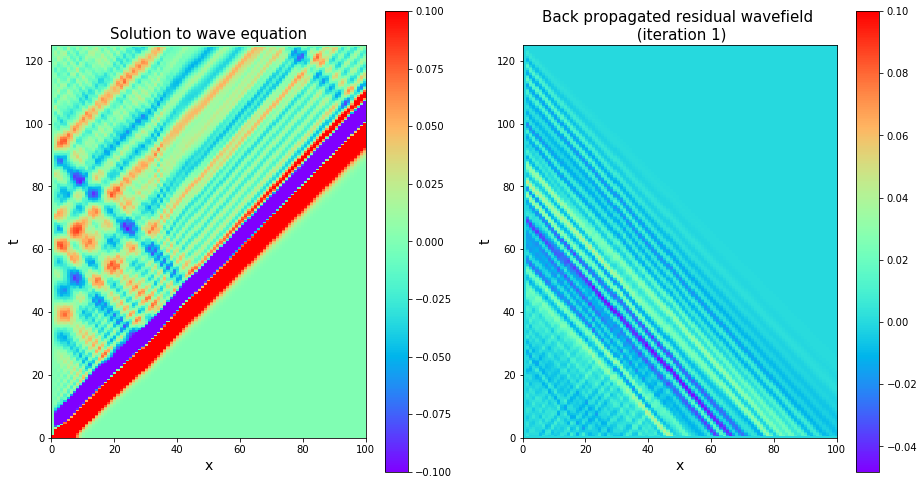

In [6]:
# Plot the forward propagated wavefield through the true model

u_display = np.clip(u_0, -0.1, 0.1)
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.subplots_adjust(left=0.1, bottom=0.1, top=0.9, right=0.9)
image = plt.imshow(u_display, vmax=0.1,extent=[0, nx-1, nt-1, 0], cmap='rainbow')
plt.title('Solution to wave equation', fontsize=15)
plt.colorbar(image)
plt.xlim(0, (nx-1)*dx)
plt.ylim(0, (nt-1)*dt)
plt.xlabel('x', fontsize=14)
plt.ylabel('t', fontsize=14)
#plt.savefig('fwi_1D_u_wavefield.png')


# Plot the back propagated residual wavefield through the initial model
w_display = np.clip(w_0, -0.1, 0.1)
plt.subplot(122)
image = plt.imshow(w_display, vmax=0.1, extent=[0, nx-1, nt-1, 0], cmap='rainbow')
plt.title('Back propagated residual wavefield \n (iteration 1)', fontsize=15)
plt.colorbar(image)
plt.xlim(0, (nx-1)*dx)
plt.ylim(0, (nt-1)*dt)
plt.xlabel('x', fontsize=14)
plt.ylabel('t', fontsize=14)
#plt.savefig('fwi_1D_w_wavefield.png')

plt.show()

## References

Aki, K., Richards, P.G. (1980) Quantitative seismology: Theory and methods, San Francisco: W.H. Freeman, 948pp.


Choi, Y., Min, D. J., Shin, C. (2008) Frequency-domain elastic full waveform inversion using the new pseudo-Hessian matrix: experience of elastic Marmousi-2 synthetic data, Bulletin of the Seismological Society of America, ${\bf 98}$, 2402 -- 2415.

Menke, W. (2012)  Geophysical Data Analysis: Discrete Inverse Theory: MATLAB edition, 330pp, Academic Press.

Mora, P. (1987) Nonlinear two-dimensional elastic inversion of multioffset seismic data,
Geophysics, ${\bf 52}$, 1211 -- 1228, http://dx.doi.org/10.1190/1.1442384.

Mora, P. (1988) Elastic wave-field inversion of reflection and transmission data,
Geophysics, ${\bf 53}$, 750 -- 759, http://dx.doi.org/10.1190/1.1442510.

Mora, P. (1989) Inversion = migration + tomography,
Geophysics, ${\bf 54}$, 1575 -- 1586, http://dx.doi.org/10.1190/1.1442625.

Tarantola, A. (1984) Inversion of seismic reflection data in the acoustic approximation,
Geophysics, ${\bf 49}$, 1259 -- 1266, http://dx.doi.org/10.1190/1.1441754.

Tarantola , A. (1988) Theoretical background for the inversion of seismic waveforms, including elasticity and attenuation, Pure and Applied Geophysics, ${\bf 128$}, 365 -- 399, http://dx.doi.org/10.1007/BF01772605.

Tarantola, A. (2005) Inverse Problem Theory and Methods for Model Parameter  Estimation, SIAM, 339pp, http://dx.doi.org/10.1137/1.9780898717921.

Warner, M., Ratcliffe, A., Nangoo, T., Morgan, J., Umbleby, A., Shah, N., Vinje, V., Stekl, I., Guasch, L., Win, C., Conroy, G., Bertrand, A (2013) Anisotropic full 3D waveform inversion, Geophysics, ${\bf 78}$, 59 -- 80, http://dx.doi.org/10.1190/geo2012-0338.1.